In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
class Ex1Func(object):
    
    def __init__(self, sigma=lambda x: 0.5):
        self.sigma = sigma

    def __call__(self, x):
        
        if x[0] < 0.5:
            return x[0]**2. +  self.sigma(x[0]) * np.random.randn()
        if x[0] == 0.5:
            return 1.
        if x[0] > 0.5:
            return 2. - (x[0]-0.5) ** 2.

In [3]:
from pyDOE import *

Text(0,0.5,u'$y$')

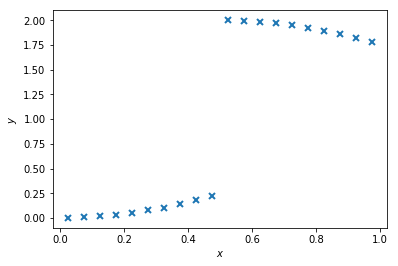

In [4]:
dim = 1
n = 20
noise=0
sigma = eval('lambda x: ' + str(noise))
objective = Ex1Func(sigma=sigma)
X = lhs(dim, n , criterion='center')
Y = np.array([objective(x) for x in X])[:, None]



#Xm = np.mean(X)
#Xv = np.std(X)
Xnorm = (X - 0.5) / 0.5

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [5]:
#build the model
k1 = hetero_kernels.RBF(1)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
m = hetero_gpmc.GPMCAdaptiveLengthscale(Xnorm, Y, k1, nonstat)

In [6]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp.V1,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.V2,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.kern1.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp.kern1.variance,[ 1.],None,+ve
adaptive_lengthscale_gp.likelihood.variance,[ 1.],None,+ve
adaptive_lengthscale_gp.nonstat.signal_variance,[ 1.],None,+ve


In [7]:
m.kern1.lengthscales = 0.5
m.kern1.lengthscales.fixed = True
m.kern1.variance = .1
m.kern1.variance.fixed = True
#m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern1.variance.prior = gpflow.priors.Gamma(1., 1.)

m.likelihood.variance = 0.01
m.likelihood.variance.fixed = True

#m.nonstat.signal_variance = 2.
#m.nonstat.signal_variance.fixed = True
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)

In [8]:
m.optimize(maxiter=5000) # start near MAP

      fun: array([ 36.75274184])
 hess_inv: <41x41 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.01213015e-03,  -5.95383218e-04,  -2.85600458e-04,
        -7.26644762e-04,  -4.59931873e-04,  -6.33436157e-04,
         3.78099162e-05,   6.77909651e-05,   1.00488531e-04,
        -6.76916726e-05,   3.27450785e-05,   3.86604338e-06,
        -9.68322759e-05,  -3.18307671e-06,  -7.74591660e-07,
        -6.27762433e-06,  -8.89757479e-05,   9.37883713e-06,
         9.24306517e-06,  -1.10147257e-05,   3.78801015e-03,
         2.60109713e-03,  -9.86859928e-04,   3.32570365e-04,
        -1.50204043e-03,   1.99492311e-04,  -1.24500323e-03,
         1.10214328e-03,   1.43607662e-04,  -4.14350120e-03,
        -3.36594199e-04,   4.46381630e-04,   1.20620570e-03,
         5.74262970e-05,   4.28905029e-04,   4.76696858e-04,
        -1.48633035e-04,   2.15159220e-04,   5.37914884e-04,
        -2.12863539e-04,  -4.65440150e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'


In [9]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp.V1,[[ -3.02004017e+00] [ -4.21627254e+00] [ -2.70443241e+00] [ -1.05640903e+00] [ -1.42551301e+00] [ 1.33753625e-01] [ -1.14330859e-01] [ 4.19519676e-02] [ 6.72628128e-02] [ -6.48683897e-02] [ 5.94748036e-03] [ -2.12699968e-03] [ -2.97793813e-02] [ 3.64558272e-03] [ -9.19080088e-05] [ -1.27755980e-03] [ -2.56420512e-02] [ -4.23787800e-05] [ -3.07257697e-04] [ -9.21572902e-05]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.V2,[[ 1.01920207e+00] [ 2.57403477e-02] [ 2.11623509e-01] [ 4.41114635e-01] [ 7.11058882e-01] [ -8.15609322e-02] [ -1.00598329e-01] [ -9.21256614e-02] [ 1.20889930e-02] [ -1.65024594e-01] [ -8.27442951e-01] [ 5.35581742e-01] [ 2.32392649e-01] [ 5.47891847e-01] [ -5.54339365e-01] [ 3.45697890e-01] [ -1.82608569e+00] [ -8.72963964e-04] [ -6.13169588e-03] [ -2.13943445e-03]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.kern1.lengthscales,[ 0.5],None,[FIXED]
adaptive_lengthscale_gp.kern1.variance,[ 0.1],"Ga([ 1.],[ 1.])",[FIXED]
adaptive_lengthscale_gp.likelihood.variance,[ 0.01],None,[FIXED]
adaptive_lengthscale_gp.nonstat.signal_variance,[ 3.54520618],"Ga([ 1.],[ 1.])",+ve


In [10]:
samples = m.sample(2000, verbose=True, epsilon=0.005, thin = 2, burn = 1000, Lmax = 160)

burn-in sampling started
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  100.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  98.0 %
Iteration:  700 	 Acc Rate:  98.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  99.0 %
Iteration:  1000 	 Acc Rate:  98.0 %
Iteration:  1100 	 Acc Rate:  100.0 %
Iteration:  1200 	 Acc Rate:  100.0 %
Iteration:  1300 	 Acc Rate:  100.0 %
Iteration:  1400 	 Acc Rate:  100.0 %
Iteration:  1500 	 Acc Rate:  99.0 %
Iteration:  1600 	 Acc Rate

In [11]:
xnew = np.linspace(0,1,50)[:,None]
xx = (xnew - 0.5)/0.5

In [12]:
sample_df = m.get_samples_df(samples)

In [13]:
sample_df

,adaptive_lengthscale_gp.V1,adaptive_lengthscale_gp.V2,adaptive_lengthscale_gp.kern1.lengthscales,adaptive_lengthscale_gp.kern1.variance,adaptive_lengthscale_gp.likelihood.variance,adaptive_lengthscale_gp.nonstat.signal_variance
0,"[[-1.13546614729], [-1.71580811915], [-1.51284...","[[0.952973154818], [-0.343607370805], [-0.0325...",[0.5],[0.1],[0.01],[3.96799172229]
1,"[[-0.877683237904], [-1.58798789727], [-1.1618...","[[0.890650690982], [-0.29566216789], [0.159749...",[0.5],[0.1],[0.01],[4.59109848599]
2,"[[-0.827131899294], [-1.78734910572], [-3.4578...","[[1.02342874503], [-0.323943282264], [-0.02835...",[0.5],[0.1],[0.01],[3.95450560616]
3,"[[-0.14087771297], [-1.78931738487], [-2.65678...","[[0.985991809199], [-0.436662979089], [-0.0174...",[0.5],[0.1],[0.01],[3.55278195408]
4,"[[-1.33819759868], [-1.85816999364], [-2.57898...","[[1.06486085623], [-0.197306040571], [-0.12304...",[0.5],[0.1],[0.01],[3.33691730539]
5,"[[-1.66441805161], [-1.20883159405], [-2.14931...","[[0.997511700941], [-0.259696858217], [0.15010...",[0.5],[0.1],[0.01],[4.04725898798]
6,"[[-2.25371232785], [-1.93593064532], [-1.83524...","[[1.00690529606], [-0.109199035543], [-0.04043...",[0.5],[0.1],[0.01],[3.66861759052]
7,"[[-1.30767751405], [-2.79801735244], [-1.79617...","[[0.926662657281], [-0.185552218045], [0.37395...",[0.5],[0.1],[0.01],[4.08460784607]
8,"[[-2.30697922152], [-2.07551763509], [-2.16739...","[[1.00113853699], [-0.0628092953716], [0.04730...",[0.5],[0.1],[0.01],[4.07929809889]
9,"[[-2.50574893037], [-1.24889630108], [-2.22164...","[[1.12840314376], [-0.202930281759], [0.033576...",[0.5],[0.1],[0.01],[3.41782407162]


In [14]:
mean_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

In [15]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_l(xx)
    var1 = v1[:,:]
    mean_l_mat[i,:] = mean1[:,0]
    var_l_mat[i,:] = np.diag(var1)

std_l_mat = np.sqrt(var_l_mat)

In [16]:
LowerlogL = mean_l_mat - 2*std_l_mat
UpperlogL = mean_l_mat + 2*std_l_mat

In [17]:
MeanL = np.exp(mean_l_mat)
LowerL = np.exp(LowerlogL)
UpperL = np.exp(UpperlogL)

In [18]:
mean_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_f(xx)
    var1 = v1[:,:,0]
    mean_f_mat[i,:] = mean1[:,0]
    var_f_mat[i,:] = np.diag(var1)

sig_samples = m.nonstat.signal_variance.get_samples_df(samples)
noise_samples = m.likelihood.variance.get_samples_df(samples)
signal_var = np.array([])
noise_var = np.array([])
for s in sig_samples:
    signal_var = np.append(signal_var, s)

for n in noise_samples:
    noise_var = np.append(noise_var, n)
    

In [19]:
def visualize(Xgrid, Mgrid, Vargrid, noise_var):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    Std_noise = np.sqrt(noise_var)
    signal_std = np.sqrt(signal_var)
 
    Stdgrid = np.sqrt(Vargrid)
    
    lower = Mgrid - 2*Stdgrid
    upper = Mgrid + 2*Stdgrid
    
    lower1 = lower - 2*Std_noise
    upper1 = upper + 2*Std_noise
    
    plt.plot(X, Y, '.')
    line, = plt.plot(Xgrid, Mgrid, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], lower, upper,
                     color = 'b', alpha = 0.05)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

In [28]:
X_true = np.linspace(0,1,100)[:,None]
Y_true = np.array([objective(x) for x in X_true])[:, None]

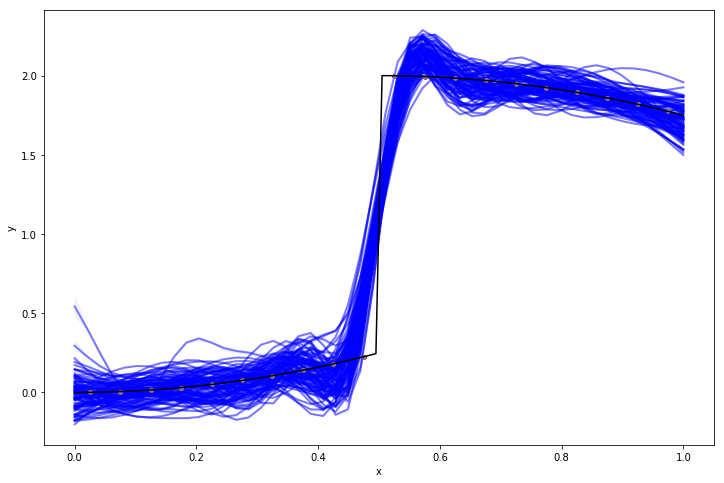

In [30]:
mini = 205
maxi = 300
plt.figure(figsize=(12,8))

for i in xrange(mini,maxi):
    visualize(xnew, mean_f_mat[i,:], var_f_mat[i,:], noise_var[i])  
plt.plot(X_true, Y_true, 'k')

In [22]:
def visualize_l(Xgrid, M, L, U):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    
    line, = plt.plot(Xgrid, M, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], L, U,
                     color = 'b', alpha = 0.25)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

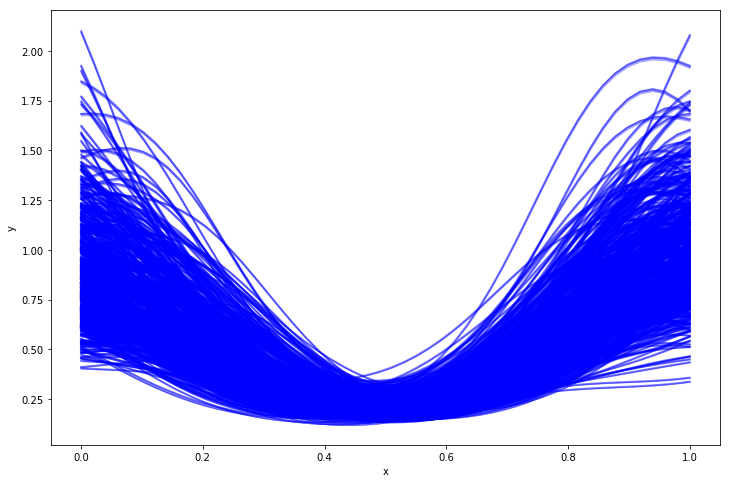

In [23]:
mini = 200
maxi = 700
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize_l(xnew, MeanL[i,:], LowerL[i,:], UpperL[i,:])  